#### Implementaion of MP Neuron From Scratch Using Numpy

* MP Neuron is the first mathematical model of a neural network proposed by
  Warren McCulloch and Walter Pitts in 1943
* Inputs can be only binary values either 0 or 1
* Outputs can be 0 or 1
* MP Neuron can only used for classification.

#### Source:
* http://wwwold.ece.utep.edu/research/webfuzzy/docs/kk-thesis/kk-thesis-html/node12.html
* http://www.mind.ilstu.edu/curriculum/modOverview.php?modGUI=212


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
# Load the data
breast_cancer = load_breast_cancer()

In [ ]:
# Get X and y pair
X,y = breast_cancer.data, breast_cancer.target
X.shape,y.shape

((569, 30), (569,))

In [146]:
# Create the dataframe from the X and y pair
df = pd.DataFrame(X,columns=breast_cancer.feature_names)
df['class'] = breast_cancer.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# shape of dataframe
df.shape

(569, 31)

In [ ]:
# Get the info of dataframe about columns datatype,count of null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [147]:
# Get Summary statistics of numerical features
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [148]:
df.groupby('class').describe()

mean radius                       ... worst fractal dimension                  
            count       mean       std  ...                     50%       75%     max
class                                   ...                                          
0           212.0  17.462830  3.203971  ...                 0.08760  0.102625  0.2075
1           357.0  12.146524  1.780512  ...                 0.07712  0.085410  0.1486

[2 rows x 240 columns]

In [149]:
df.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [150]:
# Get the class distribution
df['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

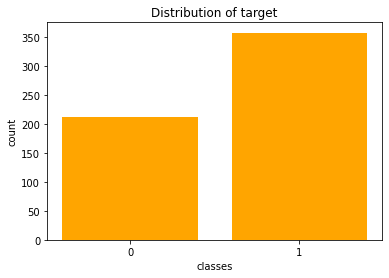

In [151]:
y = df['class'].value_counts()
x = df['class'].value_counts().index
plt.bar(x,y,color='orange')
plt.xlabel('classes')
plt.ylabel('count')
plt.title('Distribution of target')
plt.xticks([0,1])
plt.show()

In [152]:
X = df.drop('class',axis=1)
y = df['class']
X.shape, y.shape

((569, 30), (569,))

In [153]:
# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

print('Shape of X_train:{} and y_train:{}'.format(X_train.shape,y_train.shape))
print('Shape of X_test:{} and y_test:{}'.format(X_test.shape,y_test.shape))

Shape of X_train:(455, 30) and y_train:(455,)
Shape of X_test:(114, 30) and y_test:(114,)


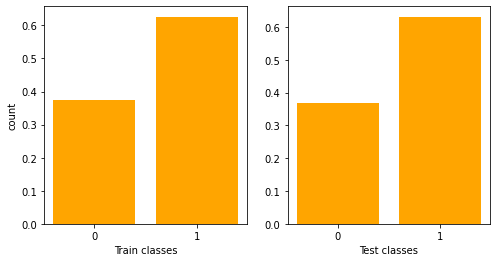

In [154]:
# check the distribution of target in train and test split
# fig, ax = plt.subplots(1,2)
fig, ax = plt.subplots(1,2,figsize=(8,4))

y1 = y_train.value_counts(normalize=True)
x1 = list(y_train.value_counts().index)
ax[0].bar(x1,y1,color='orange')
ax[0].set_ylabel('count')
ax[0].set_xlabel('Train classes')
ax[0].set_xticks([0,1])

y2 = y_test.value_counts(normalize=True)
x2 = y_test.value_counts().index
ax[1].bar(x2,y2,color='orange')
ax[1].set_xlabel('Test classes')
ax[1].set_xticks([0,1])

plt.show()

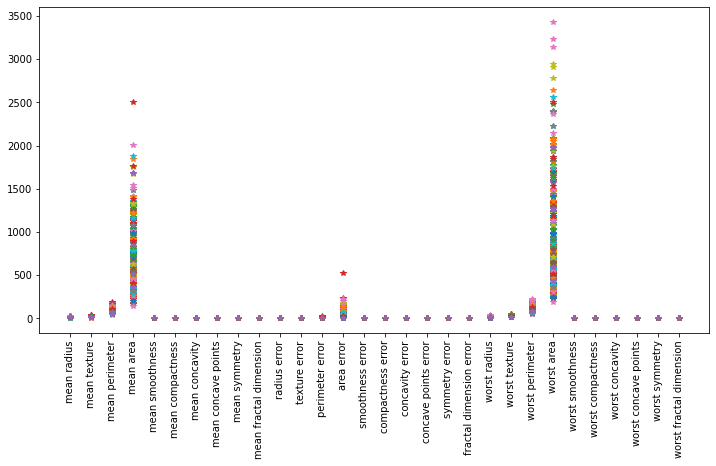

In [155]:
# plotting train data to see how data is distributed across features
plt.figure(figsize=(12,6))
plt.plot(X_train.T,"*")
plt.xticks(rotation='90')
plt.show()

In [156]:
# MP Neuron requires features should be binary not continous
X_train_bin = X_train.apply(pd.cut,bins=2, labels=[1,0])
X_test_bin = X_test.apply(pd.cut,bins=2, labels=[1,0])

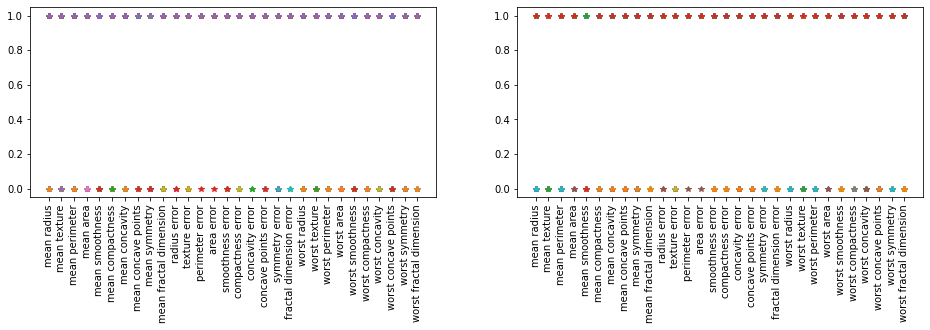

In [157]:
# plot binarized train and test data to see how data is distributed across features
fig, ax = plt.subplots(1,2,figsize=(16,3.5))

ax[0].plot(X_train_bin.T,"*")
ax[0].set_xticklabels(labels=breast_cancer.feature_names,rotation='90')

ax[1].plot(X_test_bin.T,"*")
ax[1].set_xticklabels(labels=breast_cancer.feature_names,rotation='90')

plt.show()

In [158]:
# Convert train and test dataframes to numpy
X_train_binarised = X_train_bin.values
X_test_binarised = X_test_bin.values

In [159]:
class MPNeuron:
  def __init__(self):
    self.b = 0
  
  def train(self, X, Y):
    b_values = range(X.shape[1]+1)
    best_acc = 0
    for val in b_values:
      acc = 0
      for x,y in zip(X,Y):
        y_pred = np.sum(x) >= val
        if (y==y_pred):
          acc+=1
      if acc > best_acc:
        best_acc = acc
        self.b = val
    return self
  
  def predict(self,X):
    preds = []
    for x in X:
      y_pred = np.sum(x) >= self.b
      preds.append(y_pred)
    return preds

In [163]:
# Create object of MPNeuron
model = MPNeuron()
model.train(X_train_binarised,y_train)
y_pred_train = model.predict(X_train_binarised)
y_pred_test = model.predict(X_test_binarised)

In [161]:
from sklearn.metrics import accuracy_score, f1_score

print('Train Accuracy:{} and F1_Score:{}'.format(accuracy_score(y_train,y_pred_train), f1_score(y_train,y_pred_train)))
print('Test Accuracy:{} and F1_Score:{}'.format(accuracy_score(y_test,y_pred_test), f1_score(y_test,y_pred_test)))

Train Accuracy:0.865934065934066 and F1_Score:0.8998357963875205
Test Accuracy:0.8157894736842105 and F1_Score:0.8467153284671534


In [162]:
print('Threshold value b:',model.b)

Threshold value b: 27


### References

* https://matplotlib.org/3.1.0/api/axes_api.html#matplotlib.axes.Axes